### <center> Python 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

[work place](https://www.coursera.org/learn/mathematics-and-python/peer/4vN1n/tsientral-naia-priediel-naia-tieoriema-svoimi-rukami)

#### 1. Выберите ваше любимое непрерывное распределение

Возьмем экспоненциальное распределение. Функция используется при x>0.
- [Wiki](https://ru.wikipedia.org/wiki/Экспоненциальное_распределение)
- [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

Функция распределения:
### $$ F(x) = 1 - e^{-\lambda \cdot x} $$

Функция плотности:
### $$ f(x) = \lambda e^{- \lambda \cdot x} $$


В общем случае есть коэффициент $\lambda$, но мы его прировняем к 2
##### (Если хочется можете поменять значение lambda в коде и посмотреть на изменение графиков

- Математическое ожидание: $\lambda^{-1} $
- Среднее значение: $\lambda^{-1}$
- Медиана: $\frac{ln(2)}{\lambda}$
- Дисперсия: $\lambda^{-2}$
- Среднеквадратичное отклонение: $\lambda^{-1}$

In [13]:
lam = 2  # параметр передаваемый в теор функцию, если хочется его можно изменить для наглядности
scale = 1/lam  # реализация параметра в модуле scipy
mu = lam**(-1)  # истиное мат.ожидание
disp = lam**(-2)  # истиная дисперсия

In [3]:
expon = sts.expon  # экспонет. распределение
norm = sts.norm  # нормальное распределение для ЦПТ

___
2. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

In [14]:
# расование графика, в основном для отладки
def make_beatu(sample, x, *, approx, scale=1, loc=0):
    label = f"Theoretical density,\n scale = {round(scale, 2)}, loc = {round(loc, 2)}"
    
    plt.plot(x, approx.pdf(x, scale=scale, loc=loc), label=label, linewidth=3)  # теоритическая плотность
    plt.hist(sample, density=True, label="1000 sample")  # гистограмма
    
    plt.ylabel('probability density', fontsize=14)
    plt.xlabel('$x$', fontsize=14)

    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    plt.legend(fontsize=12);

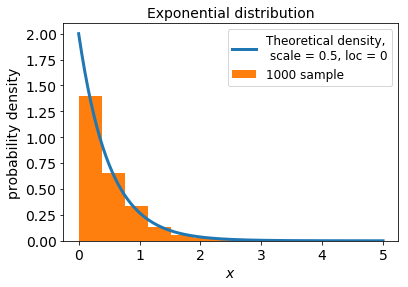

In [16]:
# loc для экпоненты задаёт смещение, его мы не задаём, поэтому он 0
sample = expon.rvs(size=1000, scale=scale, loc=0)

x = np.linspace(0, 5, 300)

make_beatu(sample, x, approx=expon, scale=scale)
plt.title("Exponential distribution", fontsize=14);

#### <center> Вывод: 
Как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

___
3. Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения

In [15]:
def flattern(some_list):
    return [j for i in some_list for j in i]

In [11]:
# Функция необходима, т.к. методы у axes и pyplot разные
def make_axe_beatu_again(x, n, axe, *, approx, scale, loc):
    # генерируем 1000 выборок с n элементами
    some = [expon.rvs(size=n, scale=scale, loc=0) for _ in range(1000)]
    
    # находим среднее выборок по n
    sample = np.apply_along_axis(np.mean, 1, some)
    
    label = f"Normal distr,\n scale = {round(scale, 2)}, loc = {loc}"
    sigma_mean = (disp/n) ** 0.5  # По определению СКО для среднего
    
    axe.plot(x,
         approx.pdf(x, scale=sigma_mean, loc=loc),
         label=label,
         linewidth=3)
    
    x_mean = np.mean(sample)  # расчитанное среднее из ЦПТ
    error = abs((loc - x_mean))  # Ошибка, разница между истиным средним и полученным из ЦПТ
    
    label = f"calc. mean: {round(x_mean, 4)},\n error: {round(error, 5)}"
                         
    axe.hist(sample, density=True, label=label)
    
    axe.set_xlabel("$\\overline{X_n}$", fontsize=16)
    axe.set_ylabel("$f(\\overline{X_n})$", fontsize=16)
    
    axe.legend(fontsize=14, loc=7)
    
    axe.set_title(f"n = {n}", fontsize=16)
    axe.tick_params(labelsize=16)
    

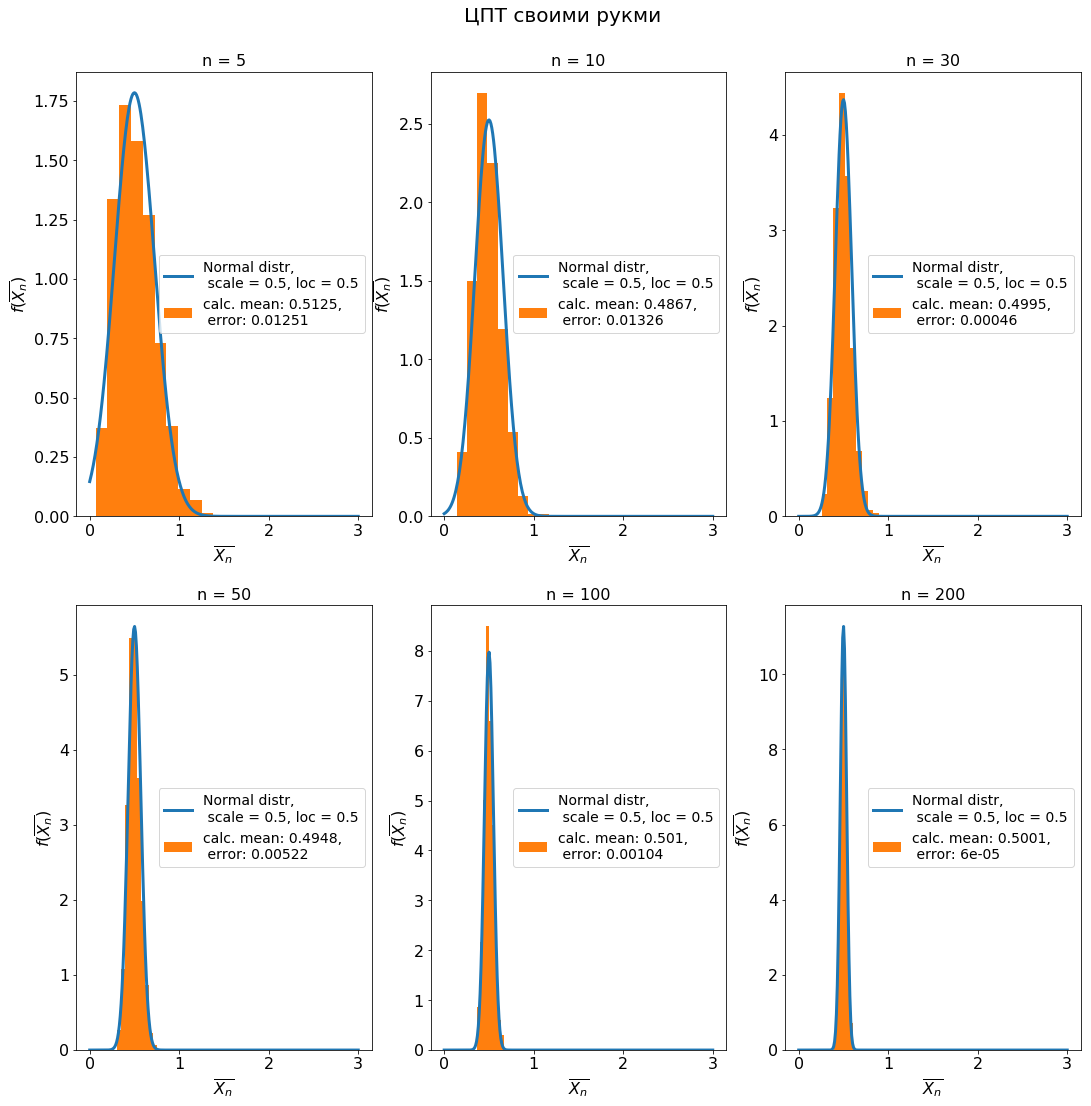

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 18))

x = np.linspace(0, 3, 300)

work_n = (5, 10, 30, 50, 100, 200)  # набор n
axes = flattern(axes)

for n, axe in zip(work_n, axes):
    loc = mu  # по определению
    make_axe_beatu_again(x, n, axe, approx=norm, scale=scale, loc=loc)

title = "ЦПТ своими рукми"
plt.suptitle(title, fontsize=20, y=0.93);

### <center> Выводы.

- Истинное среднее для экспонентциального распределения = 1/$\lambda$ (1/2 в нашем случае при $\lambda$ равной 2), как видим из набора графиков при увеличении n, среднее стремится к 1/$\lambda$. 


- Также очевидно что при увеличении n, уменьшается дисперсия и, как следсвие, СКО для оценки среднего значения. 
    
    
- Ошибка в легедах считалась как абсолютная разность между истиным значением среднего и расчётного, видно что она сильно уменьшается при увеличении n до 30.